### Eigenvector Centrality

Mike Goodrich
Brigham Young University

January 2025

---

Eigenvector centrality is determined by the following eigenvalue equation

$$ A^T {\mathbf x} = \lambda {\mathbf x} $$

where $A$ is the (directed) adjacency matrix and ${\mathbf x}$ is a column vector containing the eigenvector centrality scores for each vertex. So, the first row ov ${\mathbf x}$ is the eigenvector centrality score for vertex $1$. 

The matrix equation above is derived from the motivation of eigenvector centrality: _the centrality of a vertex should be proportional to the centrality scores of its neighbors_. Vertices with a lot of neighbors that have high centrality should also have high centrality.

Let's illustrate with an example that can help build intuition.

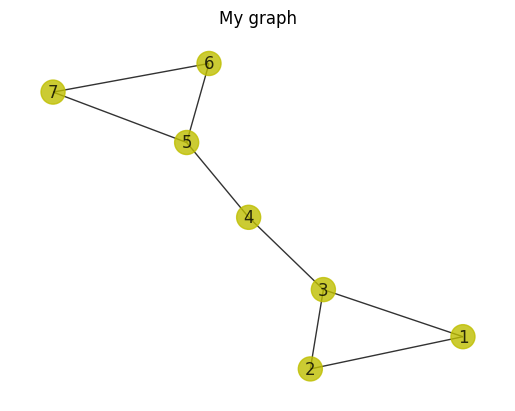

In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from network_utilities import show_graph
from numpy.typing import NDArray

G: nx.Graph = nx.barbell_graph(3,1)

# I don't want the vertices numbered from 0 to n-1 but from 1 to n.
mapping: dict[int, int] = {node: node+1 for node in G.nodes}
G = nx.relabel_nodes(G, mapping)

show_graph(G)


Your intuition probably says that vertex 4 should have the highest eigenvector centrality. Your intuition might also say that vertices 3 and 5 should have high eigenvector centrality. Let's check. 

Don't worry about the math right now. We'll discuss it in class. Let's get the adjacency matrix. Two things in the code below might be confusing.
- the `nodelist` argument puts sets up the rows and columns of the adjacency matrix in numeric order so row 1 is for vertex 1, row 2 is for vertex 2, and so on; without this parameter you can't be sure which rows and columns represent which vertices. 
- the `toarray` handles the fact that `nx.adjacency_matrix` returns a sparse array; we want a regular array so we convert it

In [91]:
A: NDArray = nx.adjacency_matrix(G, 
                                  nodelist=[node for node in sorted(G.nodes)]
                                  ).toarray()  # nx.adjacency matrix returns a sparse matrix. Convert to array
print(A)

[[0 1 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]


Let's check the first row and see if it represents the vertices to which vertex 1 is connected. From the picture of the graph, vertex 1 is connected to vertex 2 and vertex 3, and the first row of the adjacency matrix has a one in column 2 and column 3. Whew!

The math. Using code from the copilot prompt "find the principl eigenvector and eigenvalue of an adjacency matrix in python". Notice that we're finding the eigenvectors of $A^T$, so look for `A.T` in the code.

In [92]:
from typing import Tuple

def get_principal_eigen(M: np.array) -> Tuple[float, NDArray]:
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(M)

    # Find the index of the principal eigenvalue (the largest eigenvalue)
    principal_eigenvalue_index = np.argmax(eigenvalues)

    # Get the principal eigenvalue
    principal_eigenvalue = eigenvalues[principal_eigenvalue_index]

    # Get the principal eigenvector
    principal_eigenvector = eigenvectors[:, principal_eigenvalue_index]
    return principal_eigenvalue, principal_eigenvector

principal_eigenvalue, principal_eigenvector = get_principal_eigen(A.T)

print("Principal Eigenvalue:", np.round(principal_eigenvalue,2))
print("Principal Eigenvector:", np.round(principal_eigenvector,2))

Principal Eigenvalue: 2.34
Principal Eigenvector: [0.33 0.33 0.45 0.38 0.45 0.33 0.33]


It looks like our intuition was wrong. Vertex 4 doesn't have the highest centrality. Why not? 

---

It will help if we can show the _values of the eigenvector_ next to the vertex. I've added a new utility to the network utilities.

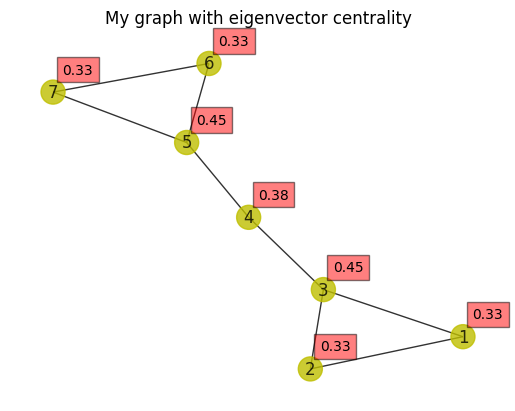

In [93]:
from network_utilities import show_graph_with_eigenvector_centrality
show_graph_with_eigenvector_centrality(G, np.round(principal_eigenvector,2))

When we say that $A^T{\mathbf x} = \lambda {\mathbf x}$ we are saying that when we multiply the vector ${\mathbf x}$ by $A^T$ a new vector is produced that is equal to the vector times a scalar. But since $A^T{\mathbf x}$ just sums up each vertices neighbors, the eigenvector equation is saying that a vertices centrality is equal to the sum of its neighbors up to a scalar. So, if we multiply the centrality of a vertex by the eigenvalue we got above, it should equal the sum of it's neighbors. 

Let's test for vertx 3 and vertex 4.

In [94]:
vertex = 4
vertex_centrality = principal_eigenvector[vertex - 1]
A.T[vertex-1,:]
print(f"vertex row in A.T = {A.T[vertex-1,:]}")
sum_of_vertex_neighbors = sum(A.T[vertex-1,:]*principal_eigenvector)
print(f"principal eigenvalue {principal_eigenvalue} * vertex centrality {vertex_centrality} = {principal_eigenvalue*vertex_centrality}")
print(f"sum of vertex's neighbors {sum_of_vertex_neighbors}")

vertex row in A.T = [0 0 1 0 1 0 0]
principal eigenvalue 2.342923082777168 * vertex centrality 0.3838092108058935 = 0.8992354593796159
sum of vertex's neighbors 0.8992354593796166


Repeat for vertex 3

In [95]:
vertex = 3
vertex_centrality = principal_eigenvector[vertex - 1]
A.T[vertex-1,:]
print(f"vertex row in A.T = {A.T[vertex-1,:]}")
sum_of_vertex_neighbors = sum(A.T[vertex-1,:]*principal_eigenvector)
print(f"principal eigenvalue {principal_eigenvalue} * vertex centrality {vertex_centrality} = {principal_eigenvalue*vertex_centrality}")
print(f"sum of vertex's neighbors {sum_of_vertex_neighbors}")

vertex row in A.T = [1 1 0 1 0 0 0]
principal eigenvalue 2.342923082777168 * vertex centrality 0.44961772968980834 = 1.0534197573161173
sum of vertex's neighbors 1.0534197573161188


We can build intuition for what is going on here by better understanding that the __eigenvectors__ of a matrix __are invariants__ of the system the matrix represents.

We'll look at a problem that is more familiar to you to demonstrate what I mean by "invariant".

---


### Eigenvectors of a matrix

Consider the matrix 

$$ M = 
\left[
    \begin{array}{cc}
        0.9 & 0.2 \\
        0.0 & 0.5
    \end{array}
\right]
$$

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

###################################################
# Define matrix and find eigenvalues
###################################################
M = np.array([[0.9,0.2],
            [0.0,0.5]])

evals,evectors = LA.eig(M)
print("eigenvalues of M are ",evals)
print("first eigenvector of M is ",evectors[:,0])
print("second eigenvector of M is ",evectors[:,1])



eigenvalues of M are  [0.9 0.5]
first eigenvector of M is  [1. 0.]
second eigenvector of M is  [-0.4472136   0.89442719]


I'm going to draw some dashed lines on a set of coordinate axes such that the dashed lines line up with the two eigenvectors. I'll explain why soon.

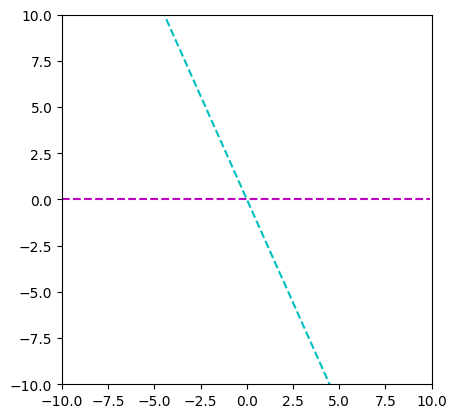

In [97]:
def initializePlot(minx = -10, maxx=10, miny=-10,maxy=10):
    ####################
    # Initialize plots #
    ####################
    fig = plt.figure()
    ax = fig.gca()
    plt.xlim(minx,maxx); plt.ylim(miny,maxy)
    ax.set_aspect('equal')
    return ax

def drawEigenvectorSpace(evectors,ax):
    """ Draw a dashed line along the axis determined by the eigenvectors
        Acts as a reference for how other vectors are rotated and scaled   
    """    
    # First eigenvector
    if evectors[0,1] == 0:
        y = np.arange(-10,10,0.1)
        x = 0*y
    else:
        m = evectors[0,0]/evectors[0,1]
        x = np.arange(-10,10,0.1)
        y = m*x
    plt.plot(x,y,'c--',label = '1st evector')
    # Second eigenvector
    if evectors[1,1] == 0:
        y = np.arange(-10,10,0.1)
        x = 0*y
    else:
        m = evectors[1,0]/evectors[1,1]
        x = np.arange(-10,10,0.1)
        y = m*x
    plt.plot(x,y,'m--', label = '2nd evector')
    ax.set_aspect('equal')

ax = initializePlot()
drawEigenvectorSpace(evectors,ax)


What I want you to notice is that the horizontal dashed line extends the line segment from the origin to the values in the first eigenvector $(1,0)$. The diagonal dashed line extends the line segment from the origin to the second eigenvector $(-0.477, 0.894)$.

We'll use those two dashed lines to illustrate what happens when we multiply an arbitrary vector by the matrix $M$. Stated simply, multipying a vector by a matrix _rotates and scales_ (stretches or shrinks) the vector.

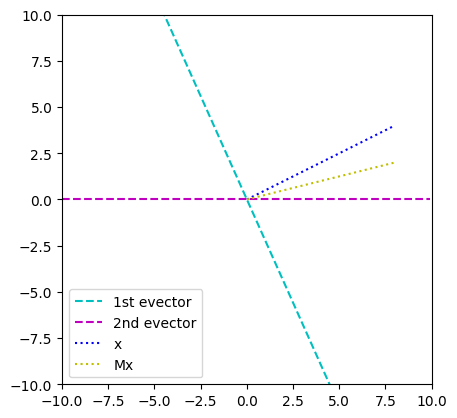

In [98]:
""" Matrices operate on vectors """
def drawVector(x,my_label, linetype = 'b-'):
    plt.plot([0,x[0,0]],[0,x[1,0]], linetype, label = my_label) 

###################################################
# Experiment with how the matrix operates on vectors
###################################################
ax = initializePlot()
drawEigenvectorSpace(evectors,ax)

x = np.array([[8],[4]],dtype = float) # column vector
y = M@x  # Ay in python shorthand
drawVector(x,'x','b:')
drawVector(y,'Mx', 'y:')
plt.legend(loc = "lower left")



The original vector is the blue dotted line. The vector $Mx$ is the yellow dotted line.

What happened to the vector and why?


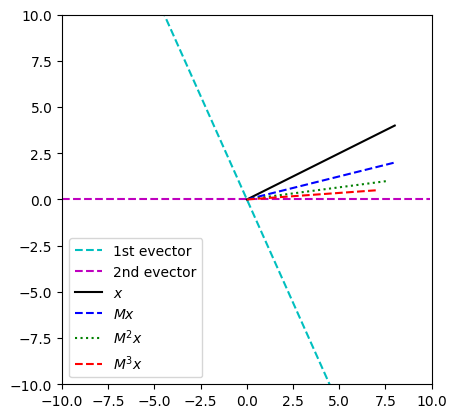

In [99]:
""" What happens if I multiply by the same matrix multiple times?"""
###################################################
# Experiment with how the matrix operates on vectors
###################################################
ax = initializePlot()
drawEigenvectorSpace(evectors,ax)

x = np.array([[8],[4]],dtype = float) # column vector
drawVector(x,'$x$','k')
drawVector(M@x,'$Mx$', 'b--')
drawVector(M@M@x,'$M^2x$', 'g:')
drawVector(M@M@M@x,'$M^3x$', 'r--')
plt.legend(loc = "lower left")

print("What happened to the vector and why?")

The first thing I want you to see is that the vector ${\mathbf x}$ rotates and scales each time we multiply it by the matrix $M$. There is more that I want you to see, but it will be easier to see if we build more intuition by changing to a different matrix.

In [100]:
""" Repeat everything above but with a matrix
    that might be easier to interpret """

M = np.array([[0.9,0.0],
            [0.0,0.5]])

evals,evectors = LA.eig(M)
print("M = ",M)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])


M =  [[0.9 0. ]
 [0.  0.5]]
eigenvalues are  [0.9 0.5]
first eigenvector is  [1. 0.]
second eigenvector is  [0. 1.]


One eigenvector is aligned with the $x$-axis and the other eigenvector is aligned with the $y$-axis. We'll see that on the next plot as long dashed lines on these axes.

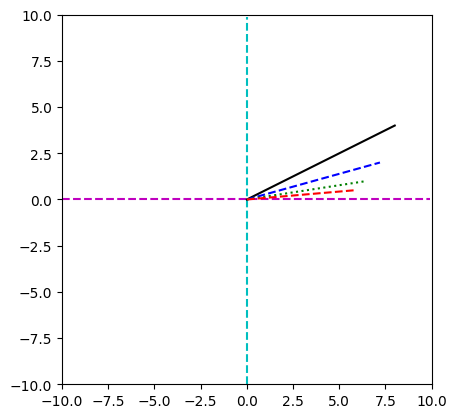

In [101]:
ax = initializePlot()
drawEigenvectorSpace(evectors,ax)
x = np.array([[8],[4]],dtype = float) # column vector
drawVector(x,'$x$','k')
drawVector(M@x,'$Mx$', 'b--')
drawVector(M@M@x,'$M^2x$', 'g:')
drawVector(M@M@M@x,'$M^3x$', 'r--')


It's pretty clear that the $y$-component of the vector is pretty rapidly approaching zero. Why does the $x$-component of the vector get smaller more slowly than the $y$-component? The answer is because one of the eigenvalues is smaller than the other. 

Let's reverse which axis has the largest eigenvalue.

M =  [[0.5 0. ]
 [0.  0.9]]
eigenvalues are  [0.5 0.9]
first eigenvector is  [1. 0.]
second eigenvector is  [0. 1.]


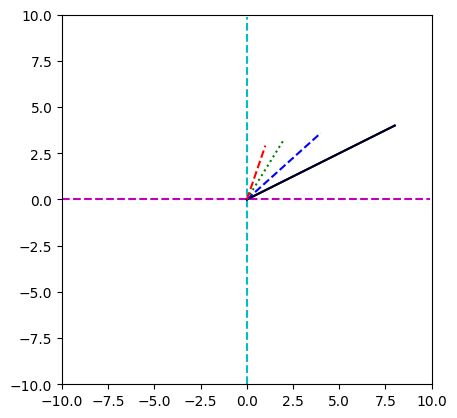

In [102]:
""" Reverse which axis has the largest eigenvalue """

M = np.array([[0.5,0.0],
            [0.0,0.9]])

evals,evectors = LA.eig(M)
print("M = ",M)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])

ax = initializePlot()
drawEigenvectorSpace(evectors,ax)
x = np.array([[8],[4]],dtype = float) # column vector
drawVector(x,'$x$')
drawVector(x,'$x$','k')
drawVector(M@x,'$Mx$', 'b--')
drawVector(M@M@x,'$M^2x$', 'g:')
drawVector(M@M@M@x,'$M^3x$', 'r--')



Note how the two eigenvectors align with the $x$ and $y$ axes. Note also that this time the $x$-component gets smaller faster than the $y$-component. 

The pattern that I hope you are seeing is that the size of the eigenvalue associated with each eigenvector determines how much stretching each time we multiply the vector by the matrix. We can formalize this idea.

---


You might remember from linear algebra that any vector can be written as a weighted sum of the eigenvectors. This simple statement assumes a lot:
- There is a matrix $M$ and you know it's eigenvectors
- The matrix is full rank, which means that none of its eigenvalues are zero
- The vector you are considering is the same size as the eigenvectors

But if these conditions apply, then the statement holds. Let ${\mathbf v}_1$ and ${\mathbf v}_2$ denote the first and second eigenvectors of a full-rank $2\times 2$ matrix $M$.  Let $\lambda_1$ and $\lambda_2$ represent the eigenvalues corresponding to the eigenvectors. By the definition of an eigenvalue/eigenvector, $M{\mathbf v}_1 = \lambda_1{\mathbf v}_1$ and $M{\mathbf v}_1 = \lambda_1{\mathbf v}_1$.

Saying that a vector can be written as the weighted sum of the eigenvectors means that any $2\times 1$ vector ${\mathbf x}$ can be written as 
$${\mathbf x} = \alpha_1{\mathbf v}_1 + \alpha_2{\mathbf v}_2 $$

Given this theorem, we can talk about why we see the patterns above. Consider what happens if we multiple ${\mathbf x}$ by $M$.

$$ \begin{array}{lcrl}
    M{\mathbf x}    &=&     M\left[\alpha_1{\mathbf v}_1 + \alpha_2{\mathbf v}_2 \right] &{\rm vector\ is\ weighted\ sum\ of\ eigenvectors}\\
                    &=&     M\alpha_1{\mathbf v}_1 + M\alpha_2{\mathbf v}_2 & {\rm distributive\ property\ of\ matrices} \\
                    &=&     \alpha_1M{\mathbf v}_1 + \alpha_2M{\mathbf v}_2 & {\rm commutative\ property\ of\ matrices\ and\ scalars} \\
                    &=&     \alpha_1\lambda_1{\mathbf v}_1 + \alpha_2\lambda_2{\mathbf v}_2 &{\rm definition\ of\ eigenvector/eigenvalue}
\end{array}
$$

So the reason we see that multiplying a vector by a matrix makes one axis get small faster than the other axis is because one of the eigenvalues is smaller than the other.

---

The next cell tries to show that the pattern generalizes even when the eigenvectors don't align with the coordinate axes. Assume we have a difference equation ${\mathbf x}_{k+1} = M {\mathbf x}_k$. It follows that ${\mathbf x}_{k+1} = M^{k+1}{\mathbf x}_0$.  We'll plot a bunch of vectors just by the endpoint and show how ${\mathbf x}_{k+1} = M^{k+1}{\mathbf x}_0$ makes ${\mathbf x}$ get small faster for the smallest eigenvector first. 

We'll return to the original matrix $M$ we started with. It has two eigenvectors: one that aligns with the $x$-axis and one that is kind of diagonal from the lower right quadrant to the upper left quadrant. The eigenvalue for the eigenvector aligned with the $x$-axis is larger than the eigenvalue fore the other eigenvector. So when we multiply the initial vector by $M$ a lot, we'll see the vector get small along the diagonal eigenvector before it gets small along the other eigenvector.

M =  [[0.9 0.2]
 [0.  0.5]]
eigenvalues are  [0.9 0.5]
first eigenvector is  [1. 0.]
second eigenvector is  [-0.4472136   0.89442719]
Why do these patterns emerge in the different quadrants?


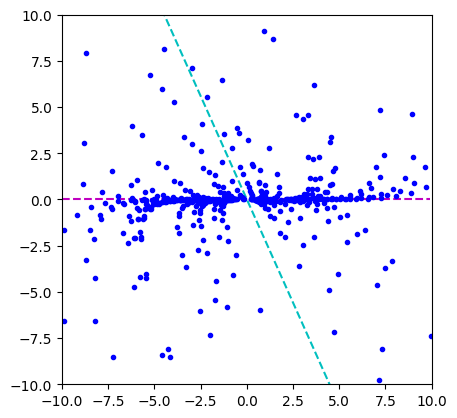

In [103]:
M = np.array([[0.9,0.2],
            [0.0,0.5]])
def drawVector_endpoint(x,my_label):
    plt.plot(x[0,0],x[1,0],'b.', label = my_label) 


evals,evectors = LA.eig(M)
print("M = ",M)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])
ax = initializePlot()
drawEigenvectorSpace(evectors,ax)

for initial_point_number in range(50):
    r1 = np.random.uniform(low=-10.0,high=10.0) 
    r2 = np.random.uniform(low=-10.0,high=10.0)
    x = np.array([[r1],[r2]],dtype = float) # column vector
    for power_of_M in range(10):
        y = LA.matrix_power(M,power_of_M)@x
        drawVector_endpoint(y,'')
print("Why do these patterns emerge in the different quadrants?")


The thing to remember from this is that the largest eigenvalue determines a lot of the long-term dynamics.

---

Naturally, when eigenvalues are bigger than one then repeatedly multiplying a vector by the matrix doesn't cause the vector to shrink; the vector grows.

M =  [[9.  0.2]
 [0.  5. ]]
eigenvalues are  [9. 5.]
first eigenvector is  [1. 0.]
second eigenvector is  [-0.04993762  0.99875234]
When the eigenvalues are bigger than zero, the vector gets huge quickly


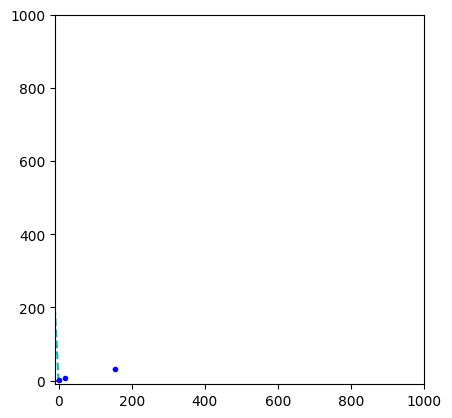

In [104]:
""" Explore what happens if the eigenvalues are larger than 1. """
M = np.array([[9,0.2],
        [0.0,5]])
evals,evectors = LA.eig(M)
print("M = ",M)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])
ax = initializePlot(minx=-10,maxx=1000,miny=-10,maxy=1000)
drawEigenvectorSpace(evectors,ax)

for initial_point_number in range(1):
    r1 = np.random.uniform(low=1.0,high=2.0) 
    r2 = np.random.uniform(low=1.0,high=2.0)
    x = np.array([[r1],[r2]],dtype = float) # column vector
    for power_of_M in range(10):
        y = LA.matrix_power(M,power_of_M)@x
        drawVector_endpoint(y,'')
print("When the eigenvalues are bigger than zero, the vector gets huge quickly")

Finally, let's just take a peak at what happens when the eigenvectors and eigenvalues have imaginary parts.

M =  [[ 0.9 -0.2]
 [ 0.2  0.9]]
eigenvalues are  [0.9+0.2j 0.9-0.2j]
first eigenvector is  [0.70710678+0.j         0.        -0.70710678j]
second eigenvector is  [0.70710678-0.j         0.        +0.70710678j]

Can't draw eigenvectors since they are imaginary

Imaginary eigenvalues require imaginary eigenvectors,
which cause vectors to rotate.


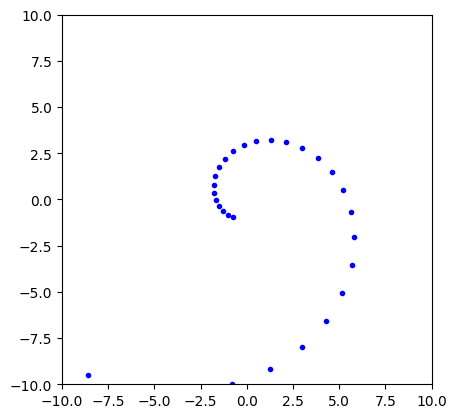

In [105]:
""" Explore what happens if the eigenvalues are imaginary. """
M = np.array([[0.9,-0.2],
        [0.2,0.9]])
evals,evectors = LA.eig(M)
print("M = ",M)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])
ax = initializePlot()
print("\nCan't draw eigenvectors since they are imaginary\n")
#drawEigenvectorSpace(evectors,ax)

for initial_point_number in range(1):
    r1 = np.random.uniform(low=-10.0,high=10.0) 
    r2 = np.random.uniform(low=-10.0,high=10.0)
    x = np.array([[r1],[r2]],dtype = float) # column vector
    for power_of_M in range(30):
        y = LA.matrix_power(M,power_of_M)@x
        drawVector_endpoint(np.real(y),'')
print("Imaginary eigenvalues require imaginary eigenvectors,")
print("which cause vectors to rotate.")

---
---

### Eigenvectors are invariants

The reason that people are interested in eigenvectors are that they are _invariants_ of linear systems. What this means is that if we multiply an eigenvector by a matrix the vector doesn't rotate; it just scales. The code in the cell below repeats one of the cells above, but the initial vector is one of the eigenvectors. I also show the eigenvectors as column vectors. 

eigenvalues of M are  [0.9 0.5]
first eigenvector of M is  [[1.]
 [0.]]
second eigenvector of M is  [[-0.4472136 ]
 [ 0.89442719]]


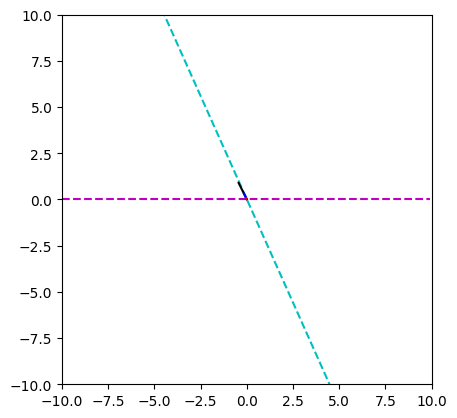

In [106]:
###################################################
# Define matrix and find eigenvalues
###################################################
M = np.array([[0.9,0.2],
            [0.0,0.5]])

evals,evectors = LA.eig(M)
print("eigenvalues of M are ",evals)
print("first eigenvector of M is ",evectors[:,0].reshape(-1,1))
print("second eigenvector of M is ",evectors[:,1].reshape(-1,1))

ax = initializePlot()
drawEigenvectorSpace(evectors,ax)
x = evectors[:,1].reshape(-1,1)
drawVector(x,'$x$','k')
drawVector(M@x,'$Mx$', 'b--')
drawVector(M@M@x,'$M^2x$', 'g:')
drawVector(M@M@M@x,'$M^3x$', 'r--')

There doesn't look like much is going on, but the important thing to notice is that each time we mutiply the eigenvector by the matrix the vector just gets smaller -- it never rotates. Thus, all the vectors are plotted on the diagonal line. 

Eigenvectors are invariants of a linear system, which means they stretch or shrink when multiplied by the matrix but they never rotate. It is this invariance property that makes eigenvectors so useful. In fact, when we say that a vector can be written as the weighted sum of the eigenvectors, we are saying that the vector can be written in terms of the invariants. 

---

The next cell was used to construct a slide in class and can be safely skipped.

In [107]:
""" Interpret eigenvectors as an assignment of values to
    elements of x that are in a special relationship to each
    other. This will lead to how we interpret the elements of
    the eigenvector of an adjacency matrix as assignments of
    values to nodes. """
A = np.array([[0.9,0.1,0],
     [0.0,0.5,0.1],
     [0,0.1,0.2]])
evals,evectors = LA.eig(A)
print("A = ",A)
print("eigenvalues are ",evals)
print("first eigenvector is ",evectors[:,0])
print("second eigenvector is ",evectors[:,1])
print("third eigenvector is ",evectors[:,2])

###################################################
# We are using column vectors.
# So when we say Ax = lambda x, we are saying that the ith row
# of A times x equals lambda times the ith element of x
###################################################
print("\nThe first row of A is ",A[0,:])
x = evectors[:,1]
print("Let x be the second eigenvector = ",x)
print("The first row of A times x is ",A[0,:]@x)
print("The second eigenvalue times the first element of x is ",evals[1]*x[0])

A =  [[0.9 0.1 0. ]
 [0.  0.5 0.1]
 [0.  0.1 0.2]]
eigenvalues are  [0.9        0.53027756 0.16972244]
first eigenvector is  [1. 0. 0.]
second eigenvector is  [-0.25060697  0.92655018  0.28053682]
third eigenvector is  [ 0.03965017 -0.28955627  0.95633939]

The first row of A is  [0.9 0.1 0. ]
Let x be the second eigenvector =  [-0.25060697  0.92655018  0.28053682]
The first row of A times x is  -0.13289125167006421
The second eigenvalue times the first element of x is  -0.1328912516700642


---

### Back to Eigenvector Centrality

Let's now return to the eigenvector centrality of the graph below, and talk about what it means in terms of eigenvectors and invariants.

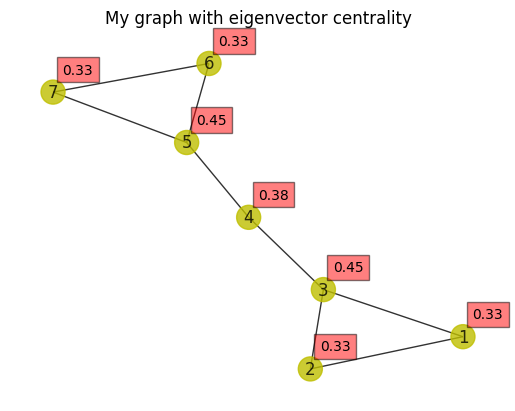

In [108]:
from network_utilities import show_graph_with_eigenvector_centrality
show_graph_with_eigenvector_centrality(G, np.round(principal_eigenvector,2))

Recall that the labels next to the vertices are the values from one of the eigenvectors. I didn't tell you why I chose one eigenvector and not the others, but we are almost to a point where I can explain why. 

There are seven vertices in the graph, so the adjacency matrix has seven eigenvectors and seven eigenvectors. Let's print those out.

In [111]:
A: NDArray = nx.adjacency_matrix(G, 
                                  nodelist=[node for node in sorted(G.nodes)]
                                  ).toarray()  # nx.adjacency matrix returns a sparse matrix. Convert to arrayprint('Adjacency matrix is ',A)
evals,evectors = LA.eig(A)
print("eigenvalues are ",np.round(evals,2))
for i in range(len(G)):
    print(f"eigenvector {i+1} is \n{evectors[:,i].reshape(-1,1)}")    

eigenvalues are  [ 2.34  2.    0.47 -1.81 -1.   -1.   -1.  ]
eigenvector 1 is 
[[0.33480527]
 [0.33480527]
 [0.44961773]
 [0.38380921]
 [0.44961773]
 [0.33480527]
 [0.33480527]]
eigenvector 2 is 
[[ 4.08248290e-01]
 [ 4.08248290e-01]
 [ 4.08248290e-01]
 [-8.46176379e-17]
 [-4.08248290e-01]
 [-4.08248290e-01]
 [-4.08248290e-01]]
eigenvector 3 is 
[[ 0.32242995]
 [ 0.32242995]
 [-0.17066752]
 [-0.72519026]
 [-0.17066752]
 [ 0.32242995]
 [ 0.32242995]]
eigenvector 4 is 
[[ 0.18423995]
 [ 0.18423995]
 [-0.51837872]
 [ 0.57165512]
 [-0.51837872]
 [ 0.18423995]
 [ 0.18423995]]
eigenvector 5 is 
[[-7.63762616e-01]
 [ 5.45544726e-01]
 [ 2.18217890e-01]
 [ 1.20951884e-16]
 [-2.18217890e-01]
 [ 1.09108945e-01]
 [ 1.09108945e-01]]
eigenvector 6 is 
[[ 7.14405615e-02]
 [ 4.81150027e-01]
 [-5.52590589e-01]
 [-2.07203905e-16]
 [ 5.52590589e-01]
 [-2.76295294e-01]
 [-2.76295294e-01]]
eigenvector 7 is 
[[ 1.36804498e-02]
 [ 1.43092000e-01]
 [-1.56772450e-01]
 [-5.84342647e-17]
 [ 1.56772450e-01]
 [-7.

Notice that one of the eigenvectors has all positive elements, while all the others have both positive and negative elements. Since the notion of _centrality_ is a measure of how important a vector is, and since every vector should have some importance in a network, it makes sense to choose the eigenvector that has all positive values. It just so happens that this eigenvector corresponds to the largets eigenvalue. We'll discuss why in class.



Let's now talk about what it means to apply the observation that eigenvectors are invariants. We are interested in the eigenvectors of the tranpose of the adjacency matrix, $A^T$. Each eigenvector ${\mathbf v}_i$ of $A^T$ satisfies the property that $A^T {\mathbf v}_i = \lambda_i {\mathbf v}_i$ where $\lambda_i$ is the eigenvalue corresponding to ${\mathbf v}_i$. The eigenvectors of $A^T$ don't rotate when we multiply them by $A^T$; they only stretch or shrink. It will get confusing if we keep using subscripts to index which eigenvector we mean, so let use ${\mathbf v}_{\rm cent}$ to represent the eigenvector used for node centrality.  

Each row in ${\mathbf v}$ corresponds to one of the vertices of the graph (since the rows and columns of $A$ correspond to graph vertices). 
Since $A$ is the adjacency matrix, and since the adjacency matrix only has $1$'s when the row and columnn vertex are neighbors, multiplying ${\mathbf v}_i$ by a row of $A^T$ is the equivalent to summing up all the neighbors of the row vertex. More precisely, let $\left[A^T\right]_j$ represent the $j^{\rm th}$ row of $A^T$. This means that $\left[A^T\right]_j$ is a $1\times n$ row vector, where $n$ is the number of vertice of the graph. The $1$'s in the row vector $\left[A^T\right]_j$ represent neighbors of node~$j$. That means when we take the product $\left[A^T\right]_j {\mathbf v}_{\rm cent}$ only those elements of ${\mathbf v}_{\rm cent}$ that correspond to neighbors of vertex~$j$ are multiplied by $1$. That means that the product $\left[A^T\right]_j {\mathbf v}_{\rm cent}$ sums up the values of vertex $j$'s neighbors. 

Let $\left[{\mathbf v}_{\rm cent}\right]_j$ represent the $j^{\rm th}$ row of ${\mathbf v}_{\rm cent}$. Then 

$$ \begin{array}{lcr}
        \left[{\mathbf v}_{\rm cent}\right]_j   &=&  \left[A^T\right]_j {\mathbf v}_{\rm cent} \\
                                                &=& \sum_{i\in N(j)} \left[{\mathbf v}_{\rm cent}\right]_i
\end{array} $$

I've run out of time and will put the rest of the discussion in the slides. Sorry

---

The following will be used for an in-class exercise.

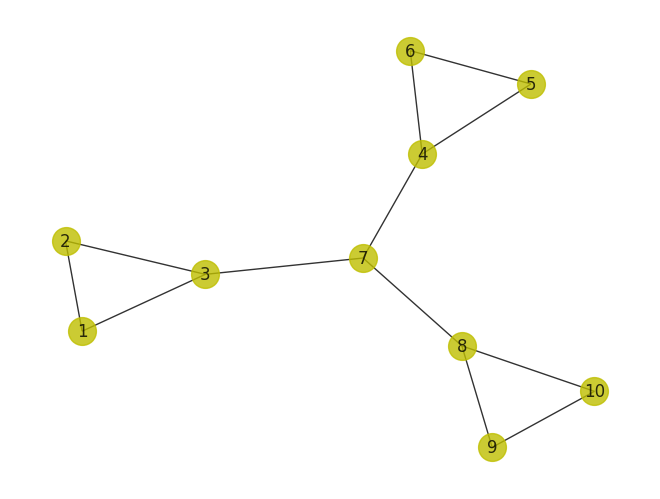

In [118]:
""" Consider a different network with an intuitive notion of what it
    means for a node to be 'central' """
    
def getG():
    G = nx.Graph()
    G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
    G.add_edges_from([(1,2),(2,3),(1,3),(3,7),(7,4),(4,5),(4,6),(5,6),(7,8),(8,9),(8,10),(9,10)])
    pos = nx.nx_pydot.graphviz_layout(G,prog='neato')
    return G, pos

G,pos = getG()
nx.draw(G,pos,node_color = 'y',node_size = 400, alpha = 0.8, with_labels = True)


Why do the nodes that feel more central have larger (in magnitude) values?


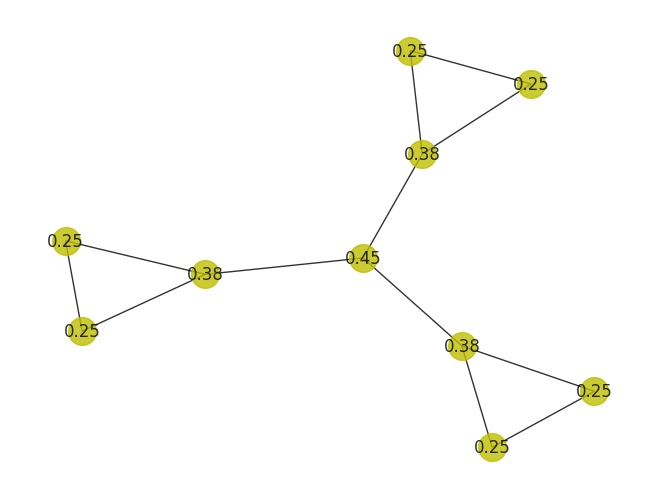

In [119]:
A: NDArray = nx.adjacency_matrix(G,nodelist=[node for node in sorted(G.nodes)]).toarray()  
evals,evectors = LA.eig(A.T)
principal_eigenvalue, principal_eigenvector = get_principal_eigen(A.T)
my_labels: dict[int, float] = {vertex: np.real(np.round(principal_eigenvector[vertex-1],2)) for vertex in sorted(G.nodes)}

nx.draw(G,pos,node_color = 'y',node_size = 400, alpha = 0.8, with_labels = True, labels = my_labels)
print("Why do the nodes that feel more central have larger (in magnitude) values?")